In [16]:
# %reset

# Generate Training Data

##### Generate Data

In [2]:
import importlib

import pickle

import gen_data
importlib.reload(gen_data)


device = "cpu"
# device = "cuda"


for i in range(3):

    filters_clean, S21_dB_clean = gen_data.gen_cheby_data(num_filters=2000, num_f_pts=1000, device=device)

    filters_var_0p1, S21_dB_var_0p1 = gen_data.gen_cheby_data(num_filters=2000, num_f_pts=1000, comp_var=0.1, device=device)

    filters_var_0p2, S21_dB_var_0p2 = gen_data.gen_cheby_data(num_filters=2000, num_f_pts=1000, comp_var=0.2, device=device)

    filters_var_0p5, S21_dB_var_0p5 = gen_data.gen_cheby_data(num_filters=2000, num_f_pts=1000, comp_var=0.5, device=device)

    filters_rand, S21_dB_rand = gen_data.gen_rand_data(num_filters=2000, num_f_pts=1000, comp_val_min=1e-14, comp_val_max=1e-6, device=device)


    # Save to a file
    data_to_save = {
        "filters_clean": filters_clean,
        "S21_dB_clean": S21_dB_clean,
        "filters_var_0p1": filters_var_0p1,
        "S21_dB_var_0p1": S21_dB_var_0p1,
        "filters_var_0p2": filters_var_0p2,
        "S21_dB_var_0p2": S21_dB_var_0p2,
        "filters_var_0p5": filters_var_0p5,
        "S21_dB_var_0p5": S21_dB_var_0p5,
        "filters_rand": filters_rand,
        "S21_dB_rand": S21_dB_rand,
    }

    # Save to file
    with open(f"../Training_Data/filter_dataset_{i+1}.pkl", "wb") as f:
        pickle.dump(data_to_save, f)

##### Load Data From File

In [19]:
import pickle


with open("../Training_Data/filter_dataset_1.pkl", "rb") as f:
    loaded_data = pickle.load(f)

# Access like a dictionary
filters_clean = loaded_data["filters_clean"]

##### Plot Data

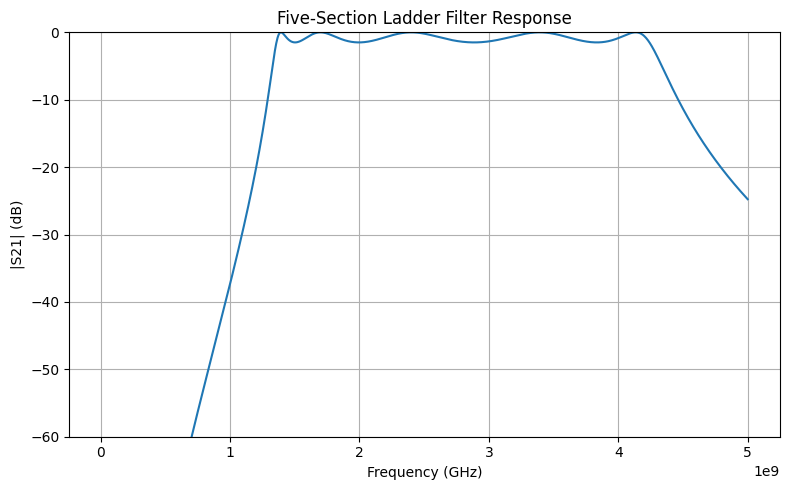

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
freq = np.linspace(0, 5e9, 1000)
plt.figure(figsize=(8, 5))
plt.plot(freq, S21_dB_clean[10,:])
# plt.xlim(2.1e9, 2.7e9)
plt.ylim(-60, 0)
# plt.ylim(-10, 0)
plt.xlabel("Frequency (GHz)")
plt.ylabel("|S21| (dB)")
plt.title("Five-Section Ladder Filter Response")
plt.grid(True)
plt.tight_layout()

## Testing Scripts

### Generate Clean Filters

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import qmc
# import torch

# import importlib
# import sys
# sys.path.append('../Functions/')
# import electrical as EE
# importlib.reload(EE)
# import electrical_sim as EE_sim
# importlib.reload(EE_sim)


# # HyperCube Sampling
# d = 3       # number of dimensions (center_freq, frac_BW, ripple_dB)
# m = 1000    # total number of samples

# sampler = qmc.LatinHypercube(d=d)
# unit_sample = sampler.random(n=m)

#                 # center_freq, frac_BW, ripple_dB
# lower_bnd = np.array([1e9, 0.1, 0.1])
# upper_bnd = np.array([4e9,  3, 2.99])
# scaled_sample = qmc.scale(unit_sample, lower_bnd, upper_bnd)   # same shape



# tensor_designs = torch.empty((m, 10))


# # Generate Clean Filters
# for r in range(m):

#     ripple_dB = scaled_sample[r, 2]
#     freq_center = scaled_sample[r, 0]
#     frac_BW = scaled_sample[r, 1]

#     tensor_designs[r,:] = EE.generate_BP( filter_style="chebyshev", order=5, ripple_dB=ripple_dB, freq_center=freq_center, frac_BW=frac_BW ).elements_2_tensor()



### Simulate Filters

In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# # from scipy.stats import qmc
# import torch

# import importlib
# import sys
# sys.path.append('../Functions/')
# import electrical as EE
# importlib.reload(EE)
# import electrical_sim as EE_sim
# importlib.reload(EE_sim)



# # device = "cuda"
# device = "cpu"

# filter_simulator = EE_sim.LadderS21(n_pts=10000).to(device)   # use "cpu" for CPU
# tensor_designs_CUDA = tensor_designs.to(device)

# data_S21_dB_CUDA = filter_simulator( tensor_designs_CUDA )


# s21_db = data_S21_dB_CUDA.to("cpu").numpy()